In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Note: 2011-2013 represent top 100 billed services. 2014-2017 represent all billed services
data_2011= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv"
data_2012= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2012.csv"
data_2013= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRG100_FY2013.csv"
data_2014= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv"
data_2015= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv"
data_2016= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2016.csv"
data_2017= "data_cms_gov/Medicare_Provider_Charge_Inpatient_DRGALL_FY2017.csv"

# Read School and Student Data File and store into Pandas Data Frames
data_2011_df = pd.read_csv(data_2011, low_memory = False)
data_2012_df = pd.read_csv(data_2012, low_memory = False)
data_2013_df = pd.read_csv(data_2013, low_memory = False)
data_2014_df = pd.read_csv(data_2014, low_memory = False)
data_2015_df = pd.read_csv(data_2015, low_memory = False)
data_2016_df = pd.read_csv(data_2016, low_memory = False)
data_2017_df = pd.read_csv(data_2017, low_memory = False)

In [3]:
# Renaming columns so relevant data for merge identified by year
years_2011_df = data_2011_df.rename(columns = {"Total Discharges":"2011 Total Discharges",
                                                "Average Covered Charges":"2011 Average Covered Charges"})
years_2012_df = data_2012_df.rename(columns = {"Total Discharges":"2012 Total Discharges",
                                                "Average Covered Charges":"2012 Average Covered Charges"})
years_2013_df = data_2013_df.rename(columns = {"Total Discharges":"2013 Total Discharges",
                                                "Average Covered Charges":"2013 Average Covered Charges"})
years_2014_df = data_2014_df.rename(columns = {"Total Discharges":"2014 Total Discharges",
                                                "Average Covered Charges":"2014 Average Covered Charges"})
years_2015_df = data_2015_df.rename(columns = {"Total Discharges":"2015 Total Discharges",
                                                "Average Covered Charges":"2015 Average Covered Charges"})
years_2016_df = data_2016_df.rename(columns = {"Total Discharges":"2016 Total Discharges",
                                                "Average Covered Charges":"2016 Average Covered Charges"})
years_2017_df = data_2017_df.rename(columns = {"Total Discharges":"2017 Total Discharges",
                                                "Average Covered Charges":"2017 Average Covered Charges"})

In [4]:
years_2011_df['DRG Definition'].value_counts()

194 - SIMPLE PNEUMONIA & PLEURISY W CC                                      3023
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             2989
292 - HEART FAILURE & SHOCK W CC                                            2953
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                2950
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC    2899
                                                                            ... 
315 - OTHER CIRCULATORY SYSTEM DIAGNOSES W CC                                859
473 - CERVICAL SPINAL FUSION W/O CC/MCC                                      846
917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC                               843
251 - PERC CARDIOVASC PROC W/O CORONARY ARTERY STENT W/O MCC                 727
885 - PSYCHOSES                                                              613
Name: DRG Definition, Length: 100, dtype: int64

In [5]:
# Preparing for merge by maintaining only relevant columns - almost all for 2011 which becomes the base
short_2011_df = years_2011_df.iloc[:,0:10]
short_2012_df = years_2012_df[["DRG Definition","Provider Id","2012 Total Discharges","2012 Average Covered Charges"]]
short_2013_df = years_2013_df[["DRG Definition","Provider Id","2013 Total Discharges","2013 Average Covered Charges"]]
short_2014_df = years_2014_df[["DRG Definition","Provider Id","2014 Total Discharges","2014 Average Covered Charges"]]
short_2015_df = years_2015_df[["DRG Definition","Provider Id","2015 Total Discharges","2015 Average Covered Charges"]]
short_2016_df = years_2016_df[["DRG Definition","Provider Id","2016 Total Discharges","2016 Average Covered Charges"]]
short_2017_df = years_2017_df[["DRG Definition","Provider Id","2017 Total Discharges","2017 Average Covered Charges"]]
len(short_2011_df.index)

163065

In [6]:
# Can someone please go through each short_df and check the data types for each dataframe. 
# The Total Discharges and Average Covered Charges need to be converted to numbers (int or float)
# so they can be used in calculations later. 2016 definitely causes errors later. 
# I think some rows in 2016 may need to be dropped in order to accomplish this. Too tired to monkey with it.

short_2016_df.dtypes

DRG Definition                  object
Provider Id                      int64
2016 Total Discharges           object
2016 Average Covered Charges    object
dtype: object

In [7]:
# merging 2011 and 2012 for rows with same procedure and provider
master_df=pd.merge(short_2011_df,short_2012_df,how='inner',on=['DRG Definition','Provider Id'])
master_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,2011 Total Discharges,2011 Average Covered Charges,2012 Total Discharges,2012 Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,95,37467.95789
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,34,15301.02941
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,25,38676.60000
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,41,15501.90244
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,12,38073.16667


In [8]:
# merging master and 2013 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2013_df,how='inner',on=['DRG Definition','Provider Id'])
master_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,2011 Total Discharges,2011 Average Covered Charges,2012 Total Discharges,2012 Average Covered Charges,2013 Total Discharges,2013 Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,95,37467.95789,98.0,37988.97959
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,34,15301.02941,34.0,15554.88235
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,25,38676.60000,30.0,40380.10000
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,41,15501.90244,17.0,22026.23529
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,12,38073.16667,17.0,45663.05882


In [9]:
len(master_df.index)

125866

In [10]:
# merging master and 2014 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2014_df,how='inner',on=['DRG Definition','Provider Id'])
master_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,2011 Total Discharges,2011 Average Covered Charges,2012 Total Discharges,2012 Average Covered Charges,2013 Total Discharges,2013 Average Covered Charges,2014 Total Discharges,2014 Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,95,37467.95789,98.0,37988.97959,93,36003.63441
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,34,15301.02941,34.0,15554.88235,50,16531.14000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,25,38676.60000,30.0,40380.10000,43,42026.81395
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,41,15501.90244,17.0,22026.23529,14,15765.35714
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,12,38073.16667,17.0,45663.05882,21,47583.61905


In [11]:
len(master_df.index)

116446

In [12]:
# merging master and 2015 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2015_df,how='inner',on=['DRG Definition','Provider Id'])
master_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,2011 Total Discharges,2011 Average Covered Charges,2012 Total Discharges,2012 Average Covered Charges,2013 Total Discharges,2013 Average Covered Charges,2014 Total Discharges,2014 Average Covered Charges,2015 Total Discharges,2015 Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,95,37467.95789,98.0,37988.97959,93,36003.63441,80,37027.24
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,34,15301.02941,34.0,15554.88235,50,16531.14000,39,16225.77
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,25,38676.60000,30.0,40380.10000,43,42026.81395,26,40792.27
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,41,15501.90244,17.0,22026.23529,14,15765.35714,29,21320.93
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,12,38073.16667,17.0,45663.05882,21,47583.61905,18,40520.17


In [13]:
len(master_df.index)

106491

In [14]:
# merging master and 2016 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2016_df,how='inner',on=['DRG Definition','Provider Id'])
master_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,2011 Total Discharges,2011 Average Covered Charges,2012 Total Discharges,2012 Average Covered Charges,2013 Total Discharges,2013 Average Covered Charges,2014 Total Discharges,2014 Average Covered Charges,2015 Total Discharges,2015 Average Covered Charges,2016 Total Discharges,2016 Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,95,37467.95789,98.0,37988.97959,93,36003.63441,80,37027.24,60,"$38,026.17"
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,34,15301.02941,34.0,15554.88235,50,16531.14000,39,16225.77,37,"$14,381.38"
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,25,38676.60000,30.0,40380.10000,43,42026.81395,26,40792.27,32,"$42,484.94"
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,41,15501.90244,17.0,22026.23529,14,15765.35714,29,21320.93,26,"$17,585.69"
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,12,38073.16667,17.0,45663.05882,21,47583.61905,18,40520.17,14,"$50,807.86"


In [15]:
len(master_df.index)

94528

In [16]:
# merging master and 2017 for rows with same procedure and provider
master_df=pd.merge(master_df,short_2017_df,how='inner',on=['DRG Definition','Provider Id'])
master_df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,2011 Total Discharges,2011 Average Covered Charges,...,2013 Total Discharges,2013 Average Covered Charges,2014 Total Discharges,2014 Average Covered Charges,2015 Total Discharges,2015 Average Covered Charges,2016 Total Discharges,2016 Average Covered Charges,2017 Total Discharges,2017 Average Covered Charges
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07692,...,98.0,37988.97959,93,36003.63441,80,37027.24,60,"$38,026.17",41,41130.56098
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85714,...,34.0,15554.88235,50,16531.14000,39,16225.77,37,"$14,381.38",37,14450.08108
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37500,...,30.0,40380.10000,43,42026.81395,26,40792.27,32,"$42,484.94",19,35486.57895
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28000,...,17.0,22026.23529,14,15765.35714,29,21320.93,26,"$17,585.69",20,20318.20000
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27778,...,17.0,45663.05882,21,47583.61905,18,40520.17,14,"$50,807.86",16,57239.62500


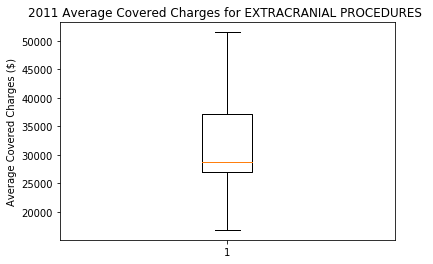

In [35]:
# # The second example again looks at the LAX temperature data set and computes quantiles

#average_charges = master_df.loc[(master_df['DRG Definition']=='039 - EXTRACRANIAL PROCEDURES W/O CC/MCC'):'2011 Average Covered Charges']

average_charges_df = master_df.loc[(master_df['DRG Definition']=='039 - EXTRACRANIAL PROCEDURES W/O CC/MCC')&
                                (master_df['Provider State']=='IL'),:]
average_charges = average_charges_df['2011 Average Covered Charges']

fig1, ax1 = plt.subplots()
ax1.set_title('2011 Average Covered Charges for EXTRACRANIAL PROCEDURES ')
ax1.set_ylabel('Average Covered Charges ($)')
ax1.boxplot(average_charges)
plt.show()

In [22]:
len(master_df.index)

88586

In [23]:
# count of unique procedures
procedure_count=len(master_df['DRG Definition'].unique())
hospital_count=len(master_df['Provider Id'].unique())

print(f'There are {procedure_count} unique procedures each performed by all {hospital_count} unique hospitals in the combined database across seven years')

There are 86 unique procedures each performed by all 2928 unique hospitals in the combined database across seven years


In [20]:
# This won't work until 2016 data types are fixed above

# Calculating tatal number for a procedure at a hospital over 7 years

# total_discharges = master_df["2011 Total Discharges"]+master_df["2012 Total Discharges"]\
#                     +master_df["2013 Total Discharges"]+master_df["2014 Total Discharges"]\
#                     +master_df["2015 Total Discharges"]+master_df["2016 Total Discharges"]\
#                     +master_df["2017 Total Discharges"]

In [21]:
# This won't work until 2016 data types are fixed above

# Calculating total costs for a procedure at a hospital over 7 years

# total_cost = master_df["2011 Total Discharges"]*master_df["2011 Average Covered Charges"]\
#             +master_df["2012 Total Discharges"]*master_df["2012 Average Covered Charges"]\
#             +master_df["2013 Total Discharges"]*master_df["2013 Average Covered Charges"]\
#             +master_df["2014 Total Discharges"]*master_df["2014 Average Covered Charges"]\
#             +master_df["2015 Total Discharges"]*master_df["2015 Average Covered Charges"]\
#             +master_df["2016 Total Discharges"]*master_df["2016 Average Covered Charges"]\
#             +master_df["2017 Total Discharges"]*master_df["2017 Average Covered Charges"]

In [21]:
# This won't work until 2016 data types are fixed above 

# Calculating tatal average cost per procedure for a specific procedure at a hospital over 7 years

# total_avg_cost = total_cost / total_discharges

In [22]:
# This won't work until 2016 data types are fixed above

# Inserting new columns into data frame

# master_df["Total Discharges"] = total_discharges
# master_df["Total Cost"] = total_cost
# master_df["Seven-Year Average Cost per Procedure"] = total_avg_cost

# check to make sure columns are inserted at end of dataframe and are calculating correctly
# master_df.head()


In [23]:
# Next steps 
# add a column with abreviated zip codes - first three digits of zip code
# bring in census data for median income per 3 digit zip code
# add column to the end with census data